Dataset cargado correctamente. Filas: 455


C:\Users\nicol\AppData\Local\Temp\ipykernel_31684\2404933588.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


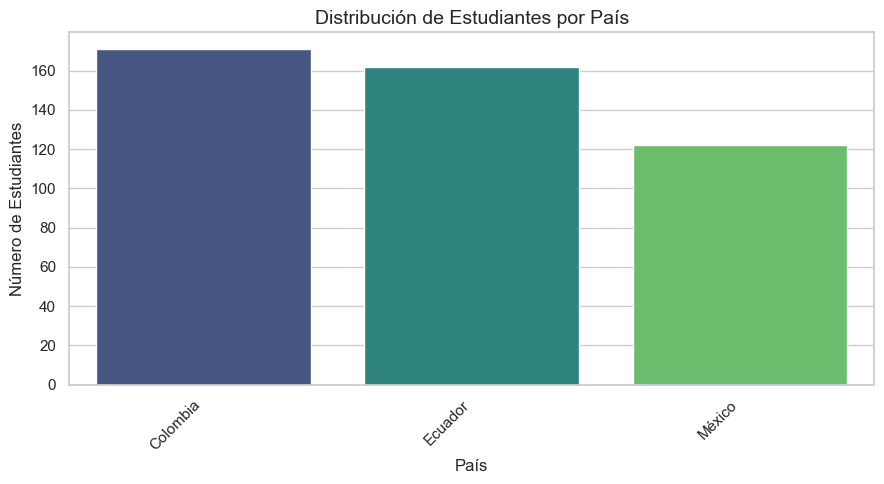

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DEFINICIÓN DEL ARCHIVO A CARGAR
file_name = "datos_depurados.xlsx" 

try:
    # Carga el archivo Excel (.xlsx). Pandas ya usa openpyxl si está instalado.
    df = pd.read_excel(file_name)
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
    
    # --- ANÁLISIS DESCRIPTIVO (Frecuencia por País) ---
    
    # Nota: Usamos el nombre de columna largo del archivo original
    country_column = '¿En qué país estás cursando tus estudios?'
    
    # 1. Contar la frecuencia de cada país
    country_counts = df[country_column].value_counts().reset_index()
    country_counts.columns = ['País', 'Frecuencia']

    # 2. Crear el gráfico de barras
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(9, 5))

    sns.barplot(
        data=country_counts,
        x='País',
        y='Frecuencia',
        palette='viridis'
    )

    # Ajustes de estilo y visualización
    plt.title('Distribución de Estudiantes por País', fontsize=14)
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Número de Estudiantes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 

except FileNotFoundError:
    print(f"ERROR: El archivo '{file_name}' no se encontró. Verifica el nombre.")
except Exception as e:
    print(f"Ocurrió un error al cargar o graficar el archivo: {e}")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CARGA DE DATOS ---
# ¡VERIFICA ESTA LÍNEA! El archivo debe estar en la misma carpeta.
file_name = "datos_depurados.xlsx" 

try:
    # Carga el archivo Excel
    df = pd.read_excel(file_name)
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado. ¡DEBES CORREGIR EL NOMBRE O LA RUTA!")
    exit()

# --- 2. GENERACIÓN DEL GRÁFICO ---
# Nota: Usamos el nombre de columna del Excel original
area_column = '¿A qué área principal pertenece tu carrera?'

# 1. Contar la frecuencia de cada área
area_counts = df[area_column].value_counts().reset_index()
area_counts.columns = ['Área de Carrera', 'Frecuencia']

# 2. Crear el gráfico de barras
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=area_counts,
    x='Frecuencia',
    y='Área de Carrera',
    hue='Área de Carrera',
    palette='viridis',
    dodge=False,
    legend=False
)

# Añadir etiquetas de valor
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', padding=5)

plt.title('Distribución de Estudiantes por Área de Carrera', fontsize=14)
plt.xlabel('Frecuencia de Estudiantes', fontsize=12)
plt.ylabel('Área de Carrera', fontsize=12)
plt.tight_layout()

# GUARDAR GRÁFICO COMO PNG
plt.savefig('grafico_frecuencia_carrera.png')
plt.close()

print("--- GRÁFICO DE FRECUENCIA GENERADO Y GUARDADO COMO PNG! ---")

Dataset cargado correctamente. Filas: 455
--- GRÁFICO DE FRECUENCIA GENERADO Y GUARDADO COMO PNG! ---


In [4]:
# (Celda 1) Carga, Codificación y Gráfico Principal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CARGA DE DATOS ---
file_name = "datos_depurados.xlsx" 
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado.")
    exit()

# --- 2. PREPARACIÓN Y CODIFICACIÓN NUMÉRICA ---

# Columnas a dropear (Metadatos/vacías)
columns_to_drop = [col for col in df.columns if col.startswith('_')] + [
    'PERFIL', 'COMPETENCIAS_IA', 'PERTINENCIA_LABORAL', 'EVALUACION_DOCENTE', 'CONFIANZA_LABORAL'
]

# Renombrado de columnas clave (para la codificación)
column_rename_map = {
    '¿En qué país estás cursando tus estudios?': 'pais',
    'Análisis e interpretación de datos.': 'comp_analisis_datos',
    'El currículo de mi carrera está alineado con las habilidades demandadas por el mercado laboral digital.': 'pert_curriculo_alineado',
    'El profesorado de mi carrera está capacitado para integrar herramientas de IA en la enseñanza.': 'eval_docente_capacitado_ia',
}

df_clean = df.drop(columns=columns_to_drop, errors='ignore').rename(columns=column_rename_map)

# Definición de la escala Likert principal (Acuerdo/Desacuerdo)
agreement_scale = {
    'Totalmente de acuerdo': 5, 'De acuerdo': 4, 'Neutral': 3, 'En desacuerdo': 2, 'Totalmente en desacuerdo': 1
}

# Aplicar la codificación (se asume que las columnas comp_ tienen la escala 1-4, y el resto 1-5)
for col in df_clean.columns:
    if col.startswith('pert_') or col.startswith('eval_') or col.startswith('conf_'):
        df_clean[col + '_num'] = df_clean[col].map(agreement_scale)
    elif col.startswith('comp_'):
        # Usamos la escala de 1-4 para Competencias (Avanzado=4, Ninguno=1)
        df_clean[col + '_num'] = df_clean[col].map({'Avanzado': 4, 'Intermedio': 3, 'Básico': 2, 'Ninguno': 1})

# --- 3. CÁLCULO DE PROMEDIOS ---
avg_metrics = ['comp_analisis_datos_num', 'pert_curriculo_alineado_num', 'eval_docente_capacitado_ia_num'] # Usamos solo 3 indicadores de ejemplo

# Calcular el promedio por indicador para cada fila (e ignoramos NaN)
df_clean['Promedio_General'] = df_clean[[c for c in df_clean.columns if c.endswith('_num')]].mean(axis=1)
df_clean['COMPETENCIAS_Promedio'] = df_clean[[c for c in df_clean.columns if c.startswith('comp_') and c.endswith('_num')]].mean(axis=1)

# Agrupar por País y calcular el promedio final
descriptive_by_country = df_clean.groupby('pais')[['COMPETENCIAS_Promedio', 'Promedio_General']].mean().reset_index()

# Preparar la tabla para graficar
df_plot = descriptive_by_country.melt(id_vars='pais', var_name='Indicador', value_name='Promedio')

# --- 4. GENERACIÓN DEL GRÁFICO ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

barplot = sns.barplot(
    data=df_plot, x='Promedio', y='Indicador', hue='pais', palette='viridis', orient='h'
)
plt.axvline(3.0, color='red', linestyle='--', linewidth=1.5, label='Nivel Neutral (3.0)')

plt.title('Gráfico de Barras Agrupadas: Promedio de Percepción por País', fontsize=16)
plt.xlabel('Promedio de Percepción (Escala Likert)', fontsize=12)
plt.ylabel('Indicador', fontsize=12)
plt.xlim(1.0, 5.0)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('grafico_comparacion_paises.png')
plt.close()
print("--- 1. GRÁFICO PRINCIPAL GUARDADO COMO: grafico_comparacion_paises.png ---")

--- 1. GRÁFICO PRINCIPAL GUARDADO COMO: grafico_comparacion_paises.png ---


In [5]:
# --- GRÁFICO DE PASTEL: DISTRIBUCIÓN POR ÁREA DE CARRERA ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CARGA DE DATOS ---
file_name = "datos_depurados.xlsx" 

try:
    df = pd.read_excel(file_name)
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado. Verifica el nombre.")
    exit()

# --- 2. GENERACIÓN DEL GRÁFICO DE PASTEL ---
# Columna del Excel original
area_column = '¿A qué área principal pertenece tu carrera?'

# 1. Calcular frecuencias (conteo de respuestas)
area_counts = df[area_column].value_counts()
labels = area_counts.index.tolist()
sizes = area_counts.values.tolist()

# Función para dar formato a las etiquetas (etiqueta + porcentaje)
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# 2. Crear la visualización
plt.figure(figsize=(10, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: func(pct, sizes), # Usa la función para mostrar % y conteo
    startangle=140,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.title('Distribución Porcentual de Estudiantes por Área de Carrera', fontsize=14)
plt.axis('equal') # Asegura que el gráfico sea un círculo

# GUARDAR GRÁFICO COMO PNG
plt.tight_layout()
plt.savefig('grafico_distribucion_areas.png')
plt.close()

print("--- GRÁFICO DE DISTRIBUCIÓN DE ÁREAS GUARDADO COMO: grafico_distribucion_areas.png ---")

Dataset cargado correctamente. Filas: 455
--- GRÁFICO DE DISTRIBUCIÓN DE ÁREAS GUARDADO COMO: grafico_distribucion_areas.png ---


In [6]:
# --- GRÁFICO DE PASTEL: DISTRIBUCIÓN POR GÉNERO ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CARGA DE DATOS ---
file_name = "datos_depurados.xlsx" 

try:
    df = pd.read_excel(file_name)
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado. Verifica el nombre.")
    exit()

# --- 2. GENERACIÓN DEL GRÁFICO DE PASTEL ---
# Columna del Excel original
gender_column = '¿Con qué género te identificas?'

# 1. Calcular frecuencias (conteo de respuestas)
gender_counts = df[gender_column].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()

# Función para dar formato a las etiquetas (etiqueta + porcentaje + conteo)
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# 2. Crear la visualización
plt.figure(figsize=(9, 9))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: func(pct, sizes), # Usa la función para mostrar % y conteo
    startangle=90,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    # Ajusta los colores si quieres que se vean mejor
    colors=sns.color_palette("pastel") 
)

plt.title('Distribución Porcentual de Estudiantes por Género', fontsize=16)
plt.axis('equal') # Asegura que el gráfico sea un círculo

# GUARDAR GRÁFICO COMO PNG
plt.tight_layout()
plt.savefig('grafico_distribucion_genero.png')
plt.close()

print("--- GRÁFICO DE DISTRIBUCIÓN DE GÉNERO GENERADO Y GUARDADO COMO: grafico_distribucion_genero.png ---")

Dataset cargado correctamente. Filas: 455
--- GRÁFICO DE DISTRIBUCIÓN DE GÉNERO GENERADO Y GUARDADO COMO: grafico_distribucion_genero.png ---


In [7]:
# --- HISTOGRAMA: DISTRIBUCIÓN POR EDAD ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re 

# --- 1. CARGA DE DATOS ---
file_name = "datos_depurados.xlsx" 
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado. Verifica el nombre.")
    exit()

# --- 2. LIMPIEZA DE EDAD (Conversión a Numérico) ---
# Columna original de edad
age_column = '¿Cuál es tu edad?'
reference_date = datetime(2025, 10, 30) 

def calculate_age(value):
    if pd.isna(value) or value is None: return np.nan
    value_str = str(value).strip()
    try: return int(value_str) # Intenta convertir a edad numérica (si ya es número)
    except ValueError: pass
    try:
        # Intenta convertir a fecha (DD/MM/YYYY) y calcular la edad
        birth_date = datetime.strptime(value_str, '%d/%m/%Y')
        age = reference_date.year - birth_date.year - ((reference_date.month, reference_date.day) < (birth_date.month, birth_date.day))
        return age
    except ValueError: return np.nan 

df['edad_num'] = df[age_column].apply(calculate_age)


# --- 3. CREACIÓN DEL HISTOGRAMA ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crea el histograma usando la columna numérica de edad
sns.histplot(
    data=df, 
    x='edad_num', 
    bins=10, 
    kde=True, # Añade una línea de densidad de probabilidad
    color='#6A5ACD'
)

# Añade una línea para la media (promedio) de edad global
media_edad = df['edad_num'].mean()
plt.axvline(media_edad, color='red', linestyle='--', linewidth=1.5, label=f'Media: {media_edad:.1f} años')

plt.title('Distribución de Frecuencia de Estudiantes por Edad', fontsize=14)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Frecuencia (Conteo)', fontsize=12)
plt.legend()
plt.xlim(df['edad_num'].min() - 1, df['edad_num'].max() + 1) # Ajuste dinámico de límites

# GUARDAR GRÁFICO COMO PNG
plt.tight_layout()
plt.savefig('grafico_distribucion_edad.png')
plt.close()

print("--- GRÁFICO DE DISTRIBUCIÓN POR EDAD GENERADO Y GUARDADO COMO: grafico_distribucion_edad.png ---")

--- GRÁFICO DE DISTRIBUCIÓN POR EDAD GENERADO Y GUARDADO COMO: grafico_distribucion_edad.png ---


In [9]:
# --- GRÁFICO DE DISPERSIÓN (CORRELACIÓN AVANZADA) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CARGA Y PREPARACIÓN INICIAL ---
file_name = "datos_depurados.xlsx" 

try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"ERROR: Archivo '{file_name}' no encontrado. Verifica el nombre.")
    exit()

# Diccionario de Renombre para columnas clave (Necesario para el código)
column_rename_map = {
    '¿En qué país estás cursando tus estudios?': 'pais',
    'Análisis e interpretación de datos.': 'comp_analisis_datos',
    'El currículo de mi carrera está alineado con las habilidades demandadas por el mercado laboral digital.': 'pert_curriculo_alineado',
}

df_clean = df.rename(columns=column_rename_map, errors='ignore')

# --- 2. CODIFICACIÓN NUMÉRICA (Likert) ---
agreement_scale = {
    'Totalmente de acuerdo': 5, 'De acuerdo': 4, 'Neutral': 3, 'En desacuerdo': 2, 'Totalmente en desacuerdo': 1
}
skill_scale = {
    'Avanzado': 4, 'Intermedio': 3, 'Básico': 2, 'Ninguno': 1
}

# Aplicar las codificaciones
df_clean['pert_curriculo_alineado_num'] = df_clean['pert_curriculo_alineado'].map(agreement_scale)
df_clean['comp_analisis_datos_num'] = df_clean['comp_analisis_datos'].map(skill_scale)


# --- 3. CÁLCULO DE PROMEDIOS POR FILA ---
# Usaremos las columnas que existen en el DataFrame después del renombrado
comp_cols = [col for col in df_clean.columns if col.startswith('comp_') and not col.endswith('_num')]
pert_cols = [col for col in df_clean.columns if col.startswith('pert_') and not col.endswith('_num')]

# Calcular el promedio de todas las columnas de Competencias y Pertinencia para cada estudiante
df_clean['COMPETENCIAS_IA_Promedio'] = df_clean[[c for c in df_clean.columns if c.startswith('comp_') and c.endswith('_num')]].mean(axis=1)
df_clean['PERTINENCIA_LABORAL_Promedio'] = df_clean[[c for c in df_clean.columns if c.startswith('pert_') and c.endswith('_num')]].mean(axis=1)


# --- 4. GENERACIÓN DEL GRÁFICO DE DISPERSIÓN ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))

# Crea el gráfico de dispersión, coloreado por país
scatter = sns.scatterplot(
    data=df_clean,
    x='COMPETENCIAS_IA_Promedio',
    y='PERTINENCIA_LABORAL_Promedio',
    hue='pais',
    palette='deep',
    s=100, # Tamaño de los puntos
    alpha=0.6 # Transparencia
)

# Ajustes de estilo
plt.title('Correlación entre Competencias Digitales y Pertinencia Laboral', fontsize=14)
plt.xlabel('Promedio de Competencias Digitales (Escala 1-4)', fontsize=12)
plt.ylabel('Promedio de Pertinencia Laboral (Escala 1-5)', fontsize=12)
plt.legend(title='País', loc='upper left')

plt.tight_layout()

# GUARDAR GRÁFICO COMO PNG
plt.savefig('grafico_correlacion_comp_vs_pert.png')
plt.close()

print("--- GRÁFICO DE CORRELACIÓN GUARDADO COMO: grafico_correlacion_comp_vs_pert.png ---")

--- GRÁFICO DE CORRELACIÓN GUARDADO COMO: grafico_correlacion_comp_vs_pert.png ---
